In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.decomposition import PCA
from scipy.stats import zscore

sales_df = pd.read_csv('sales_data_sample1.csv')
sales_df.dtypes

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

In [2]:
sales_df.head(5)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,05-07-2003 00:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,07-01-2003 00:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10-10-2003 00:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [3]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [4]:
sales_df.drop_duplicates(keep=False)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,05-07-2003 00:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,07-01-2003 00:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10-10-2003 00:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12-02-2004 00:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,03-01-2005 00:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


In [5]:
sales_df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [6]:
sales_df.fillna(sales_df.select_dtypes(include='object').mode().iloc[0], inplace=True)

In [7]:
sales_df.isnull().sum()

ORDERNUMBER         0
QUANTITYORDERED     0
PRICEEACH           0
ORDERLINENUMBER     0
SALES               0
ORDERDATE           0
STATUS              0
QTR_ID              0
MONTH_ID            0
YEAR_ID             0
PRODUCTLINE         0
MSRP                0
PRODUCTCODE         0
CUSTOMERNAME        0
PHONE               0
ADDRESSLINE1        0
ADDRESSLINE2        0
CITY                0
STATE               0
POSTALCODE          0
COUNTRY             0
TERRITORY           0
CONTACTLASTNAME     0
CONTACTFIRSTNAME    0
DEALSIZE            0
dtype: int64

In [8]:
sales_df.head(30)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,Level 3,NYC,NY,10022,USA,EMEA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,05-07-2003 00:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,Level 3,Reims,CA,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,07-01-2003 00:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,Level 3,Paris,CA,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,Level 3,Pasadena,CA,90003,USA,EMEA,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10-10-2003 00:00,Shipped,4,10,2003,...,7734 Strong St.,Level 3,San Francisco,CA,28034,USA,EMEA,Brown,Julie,Medium
5,10168,36,96.66,1,3479.76,10/28/2003 0:00,Shipped,4,10,2003,...,9408 Furth Circle,Level 3,Burlingame,CA,94217,USA,EMEA,Hirano,Juri,Medium
6,10180,29,86.13,9,2497.77,11-11-2003 00:00,Shipped,4,11,2003,...,"184, chausse de Tournai",Level 3,Lille,CA,59000,France,EMEA,Rance,Martine,Small
7,10188,48,100.00,1,5512.32,11/18/2003 0:00,Shipped,4,11,2003,...,"Drammen 121, PR 744 Sentrum",Level 3,Bergen,CA,N 5804,Norway,EMEA,Oeztan,Veysel,Medium
8,10201,22,98.57,2,2168.54,12-01-2003 00:00,Shipped,4,12,2003,...,5557 North Pendale Street,Level 3,San Francisco,CA,28034,USA,EMEA,Murphy,Julie,Small
9,10211,41,100.00,14,4708.44,1/15/2004 0:00,Shipped,1,1,2004,...,"25, rue Lauriston",Level 3,Paris,CA,75016,France,EMEA,Perrier,Dominique,Medium


In [9]:
df_drop  = ['ADDRESSLINE2','ORDERDATE','PHONE']
sales_df = sales_df.drop(df_drop, axis = 1)
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   STATUS            2823 non-null   object 
 6   QTR_ID            2823 non-null   int64  
 7   MONTH_ID          2823 non-null   int64  
 8   YEAR_ID           2823 non-null   int64  
 9   PRODUCTLINE       2823 non-null   object 
 10  MSRP              2823 non-null   int64  
 11  PRODUCTCODE       2823 non-null   object 
 12  CUSTOMERNAME      2823 non-null   object 
 13  ADDRESSLINE1      2823 non-null   object 
 14  CITY              2823 non-null   object 
 15  STATE             2823 non-null   object 
 16  POSTALCODE        2823 non-null   object 


In [10]:
sales_df['STATUS']=sales_df['STATUS'].replace({'Shipped':1,'Cancelled':0,'Resolved':0,'On Hold':0,'In Process':0,'Disputed':0})

In [11]:
sales_df.head(10)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,...,CUSTOMERNAME,ADDRESSLINE1,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,1,1,2,2003,Motorcycles,...,Land of Toys Inc.,897 Long Airport Avenue,NYC,NY,10022,USA,EMEA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,1,2,5,2003,Motorcycles,...,Reims Collectables,59 rue de l'Abbaye,Reims,CA,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,1,3,7,2003,Motorcycles,...,Lyon Souveniers,27 rue du Colonel Pierre Avia,Paris,CA,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,1,3,8,2003,Motorcycles,...,Toys4GrownUps.com,78934 Hillside Dr.,Pasadena,CA,90003,USA,EMEA,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,1,4,10,2003,Motorcycles,...,Corporate Gift Ideas Co.,7734 Strong St.,San Francisco,CA,28034,USA,EMEA,Brown,Julie,Medium
5,10168,36,96.66,1,3479.76,1,4,10,2003,Motorcycles,...,Technics Stores Inc.,9408 Furth Circle,Burlingame,CA,94217,USA,EMEA,Hirano,Juri,Medium
6,10180,29,86.13,9,2497.77,1,4,11,2003,Motorcycles,...,Daedalus Designs Imports,"184, chausse de Tournai",Lille,CA,59000,France,EMEA,Rance,Martine,Small
7,10188,48,100.00,1,5512.32,1,4,11,2003,Motorcycles,...,Herkku Gifts,"Drammen 121, PR 744 Sentrum",Bergen,CA,N 5804,Norway,EMEA,Oeztan,Veysel,Medium
8,10201,22,98.57,2,2168.54,1,4,12,2003,Motorcycles,...,Mini Wheels Co.,5557 North Pendale Street,San Francisco,CA,28034,USA,EMEA,Murphy,Julie,Small
9,10211,41,100.00,14,4708.44,1,1,1,2004,Motorcycles,...,Auto Canal Petit,"25, rue Lauriston",Paris,CA,75016,France,EMEA,Perrier,Dominique,Medium


In [12]:
sales_df=pd.get_dummies(sales_df, columns=['PRODUCTLINE','PRODUCTCODE','CUSTOMERNAME','ADDRESSLINE1','CITY','STATE','POSTALCODE','COUNTRY','TERRITORY','CONTACTLASTNAME','CONTACTFIRSTNAME','DEALSIZE'])
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Columns: 646 entries, ORDERNUMBER to DEALSIZE_Small
dtypes: float64(2), int64(8), uint8(636)
memory usage: 1.9 MB


In [13]:
sales_df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,STATUS,QTR_ID,MONTH_ID,YEAR_ID,MSRP,...,CONTACTFIRSTNAME_Veysel,CONTACTFIRSTNAME_Victoria,CONTACTFIRSTNAME_Violeta,CONTACTFIRSTNAME_Wendy,CONTACTFIRSTNAME_William,CONTACTFIRSTNAME_Wing C,CONTACTFIRSTNAME_Yoshi,DEALSIZE_Large,DEALSIZE_Medium,DEALSIZE_Small
0,10107,30,95.70,2,2871.00,1,1,2,2003,95,...,0,0,0,0,0,0,0,0,0,1
1,10121,34,81.35,5,2765.90,1,2,5,2003,95,...,0,0,0,0,0,0,0,0,0,1
2,10134,41,94.74,2,3884.34,1,3,7,2003,95,...,0,0,0,0,0,0,0,0,1,0
3,10145,45,83.26,6,3746.70,1,3,8,2003,95,...,0,0,0,0,0,0,0,0,1,0
4,10159,49,100.00,14,5205.27,1,4,10,2003,95,...,0,0,0,0,0,0,0,0,1,0


In [14]:
scaler = StandardScaler()
scaler.fit(sales_df)
x_scaled = scaler.transform(sales_df)

In [15]:
x_scaled - x_scaled.mean(axis=0)

array([[-1.64794709, -0.52289086,  0.5969775 , ..., -0.24267205,
        -0.98070333,  1.09637041],
       [-1.4958875 , -0.11220131, -0.11445035, ..., -0.24267205,
        -0.98070333,  1.09637041],
       [-1.35468931,  0.60650538,  0.54938372, ..., -0.24267205,
         1.01967636, -0.9121005 ],
       ...,
       [ 1.38238338,  0.81185016,  0.81015797, ..., -0.24267205,
         1.01967636, -0.9121005 ],
       [ 1.50185877, -0.11220131, -1.06186404, ..., -0.24267205,
        -0.98070333,  1.09637041],
       [ 1.68650256,  1.2225397 , -0.89925195, ..., -0.24267205,
         1.01967636, -0.9121005 ]])

In [16]:
covarience_matrix = np.cov(x_scaled,rowvar=False)

In [17]:
eigen_values, eigen_vectors=np.linalg.eig(covarience_matrix)

In [18]:
eigen_vectors.shape

(646, 646)

In [19]:
principal_components = np.dot(x_scaled,eigen_vectors)
principal_components

array([[ 7.45682344e-01+0.00000000e+00j, -1.18540675e+00+0.00000000e+00j,
         4.96692041e+00+0.00000000e+00j, ...,
         1.33226763e-15+1.56819002e-15j, -1.72084569e-15+0.00000000e+00j,
        -1.08246745e-15+0.00000000e+00j],
       [ 1.13858821e+00+0.00000000e+00j,  4.51692961e-01+0.00000000e+00j,
        -2.21799010e+00+0.00000000e+00j, ...,
        -3.88578059e-16+8.81239526e-16j, -1.80411242e-15+0.00000000e+00j,
         2.16493490e-15+0.00000000e+00j],
       [ 1.17521427e+00+0.00000000e+00j,  8.97751337e-02+0.00000000e+00j,
        -1.85705606e+00+0.00000000e+00j, ...,
        -1.25160299e-15+1.21777588e-15j, -6.52256027e-16+0.00000000e+00j,
        -6.38378239e-16+0.00000000e+00j],
       ...,
       [ 1.81286756e+00+0.00000000e+00j,  4.73864943e-01+0.00000000e+00j,
        -3.48851820e+00+0.00000000e+00j, ...,
         6.92154667e-16-7.49400542e-16j, -2.15105711e-16+0.00000000e+00j,
         9.02056208e-16+0.00000000e+00j],
       [ 1.43633888e+00+0.00000000e+00j,  5.

C:\Users\prave\anaconda3\lib\site-packages\matplotlib\collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


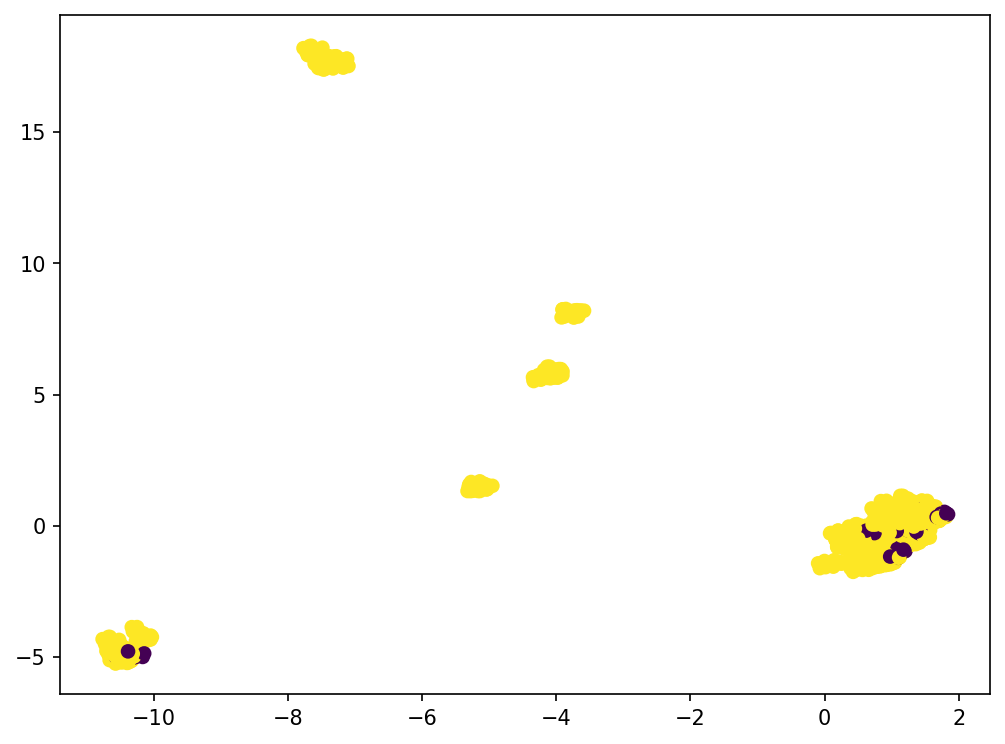

In [20]:
plt.figure(figsize=(8,6),dpi=150)
plt.scatter(principal_components[:,0],principal_components[:,1],c=sales_df['STATUS'])

In [21]:
sales_df['STATUS'].value_counts()

1    2617
0     206
Name: STATUS, dtype: int64

In [22]:
from sklearn.preprocessing import scale
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix


x = np.asarray(sales_df.drop('STATUS', axis = 1))
Y= np.asarray(sales_df[['STATUS']])

In [23]:
scale = StandardScaler()
scale.fit(x)
X = scale.transform(x)

In [24]:
clf = LinearDiscriminantAnalysis()
model=clf.fit(X,Y)
model

C:\Users\prave\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearDiscriminantAnalysis()

In [25]:
pred_class = model.predict(X)
sales_df['Prediction'] = pred_class

In [26]:
data=sales_df
Cor1=data.corr()
Cor1

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,STATUS,QTR_ID,MONTH_ID,YEAR_ID,MSRP,...,CONTACTFIRSTNAME_Victoria,CONTACTFIRSTNAME_Violeta,CONTACTFIRSTNAME_Wendy,CONTACTFIRSTNAME_William,CONTACTFIRSTNAME_Wing C,CONTACTFIRSTNAME_Yoshi,DEALSIZE_Large,DEALSIZE_Medium,DEALSIZE_Small,Prediction
ORDERNUMBER,1.000000,0.065543,-0.002935,-0.055550,0.039919,-0.249238,-0.051383,-0.039723,0.904596,-0.010280,...,-0.007423,0.068073,0.014467,0.070914,-0.094310,0.000746,0.032522,-0.007862,-0.007075,-0.209285
QUANTITYORDERED,0.065543,1.000000,0.005564,-0.018397,0.551426,-0.060812,-0.035323,-0.039048,0.069535,0.017881,...,-0.003204,-0.003584,-0.008862,0.071553,-0.029005,-0.028556,0.302231,0.287417,-0.427695,-0.084424
PRICEEACH,-0.002935,0.005564,1.000000,-0.020965,0.657841,0.009488,0.008712,0.005152,-0.005938,0.670625,...,-0.038404,0.014382,-0.023286,0.005749,-0.002011,0.011047,0.194191,0.569012,-0.660698,-0.011147
ORDERLINENUMBER,-0.055550,-0.018397,-0.020965,1.000000,-0.058400,-0.010305,0.040716,0.034016,-0.057367,-0.021067,...,0.081974,-0.005372,-0.004320,-0.030042,0.039160,-0.009778,-0.062992,-0.010596,0.039634,0.016814
SALES,0.039919,0.551426,0.657841,-0.058400,1.000000,-0.006676,-0.006796,-0.009605,0.035647,0.635239,...,-0.033854,0.013134,-0.021329,0.019244,-0.026832,-0.006446,0.624604,0.449758,-0.739079,-0.025166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CONTACTFIRSTNAME_Yoshi,0.000746,-0.028556,0.011047,-0.009778,-0.006446,0.024865,0.094416,0.094723,-0.039918,0.012558,...,-0.012021,-0.008545,-0.010073,-0.007672,-0.009930,1.000000,-0.003929,-0.006331,0.008165,0.026332
DEALSIZE_Large,0.032522,0.302231,0.194191,-0.062992,0.624604,-0.015115,-0.018845,-0.021357,0.033211,0.347085,...,-0.021311,0.008964,-0.013805,0.050944,-0.013221,-0.003929,1.000000,-0.237989,-0.221341,-0.024142
DEALSIZE_Medium,-0.007862,0.287417,0.569012,-0.010596,0.449758,-0.013641,0.002199,0.003303,-0.012241,0.369366,...,-0.000017,0.001879,-0.016731,-0.010683,-0.013826,-0.006331,-0.237989,1.000000,-0.894500,-0.022660
DEALSIZE_Small,-0.007075,-0.427695,-0.660698,0.039634,-0.739079,0.020653,0.006466,0.006514,-0.002996,-0.530621,...,0.009826,-0.006013,0.023153,-0.012723,0.019968,0.008165,-0.221341,-0.894500,1.000000,0.033864


In [27]:
confusion_matrix(Y,pred_class)

array([[ 140,   66],
       [  89, 2528]], dtype=int64)

In [28]:
from sklearn.metrics import classification_report
print(classification_report(Y,pred_class))

              precision    recall  f1-score   support

           0       0.61      0.68      0.64       206
           1       0.97      0.97      0.97      2617

    accuracy                           0.95      2823
   macro avg       0.79      0.82      0.81      2823
weighted avg       0.95      0.95      0.95      2823

